In [12]:
import seaborn as sns
sns.set()

In [13]:
from LecturaDatos import read_data

In [14]:
df_clean= read_data()

In [15]:
#sns.boxplot(df1['UNIDADES'])

print(len(df_clean))

202


In [16]:
## HOLT- WINTERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Aplicar modelo Holt-Winters adictivo
print("Aplicando modelo Holt-Winters adictivo...")
# Usar modelo aditivo (más estable)
model = ExponentialSmoothing(
    df_clean['UNIDADES'],
    trend='additive',
    seasonal='additive',
    seasonal_periods=12,
    damped_trend=True
).fit(optimized=True)

# Obtener valores ajustados
valores_ajustados = model.fittedvalues

# Calcular errores (exactamente igual que HP)
errores = df_clean['UNIDADES'] - valores_ajustados

# Extraer componente estacional del modelo
try:
    # Método 1: Usar descomposición estacional
    decomp = seasonal_decompose(df1['UNIDADES'], model='additive', period=12)
    componente_estacional = decomp.seasonal
except:
    # Método 2: Calcular estacionalidad simple
    componente_estacional = valores_ajustados - valores_ajustados.rolling(window=12, center=True).mean()

Aplicando modelo Holt-Winters adictivo...


In [18]:
# Estadísticas descriptivas 
print(f"Desviación estándar - Original: {df_clean['UNIDADES'].std():.2f}")
print(f"Desviación estándar - Ajuste HW: {valores_ajustados.std():.2f}")

Desviación estándar - Original: 18061.74
Desviación estándar - Ajuste HW: 14810.55


In [19]:
#Meses que no se vendieron
filas_con_cero = df_clean[df_clean['UNIDADES'] == 0]
print(filas_con_cero)

Empty DataFrame
Columns: [FECHA, UNIDADES]
Index: []


In [20]:
# Calcular métricas 
mask = df_clean['UNIDADES'] != 0
mape = np.mean(np.abs(errores[mask] / df_clean['UNIDADES'][mask])) * 100

mae = mean_absolute_error(df_clean['UNIDADES'], valores_ajustados)
mse = mean_squared_error(df_clean['UNIDADES'], valores_ajustados)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errores / df_clean['UNIDADES'])) * 100
# Crear diccionario de métricas 
metricas_hw = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'Error_promedio': np.mean(errores),
    'Error_std': np.std(errores)
}
print(mape)

27.701417377230435


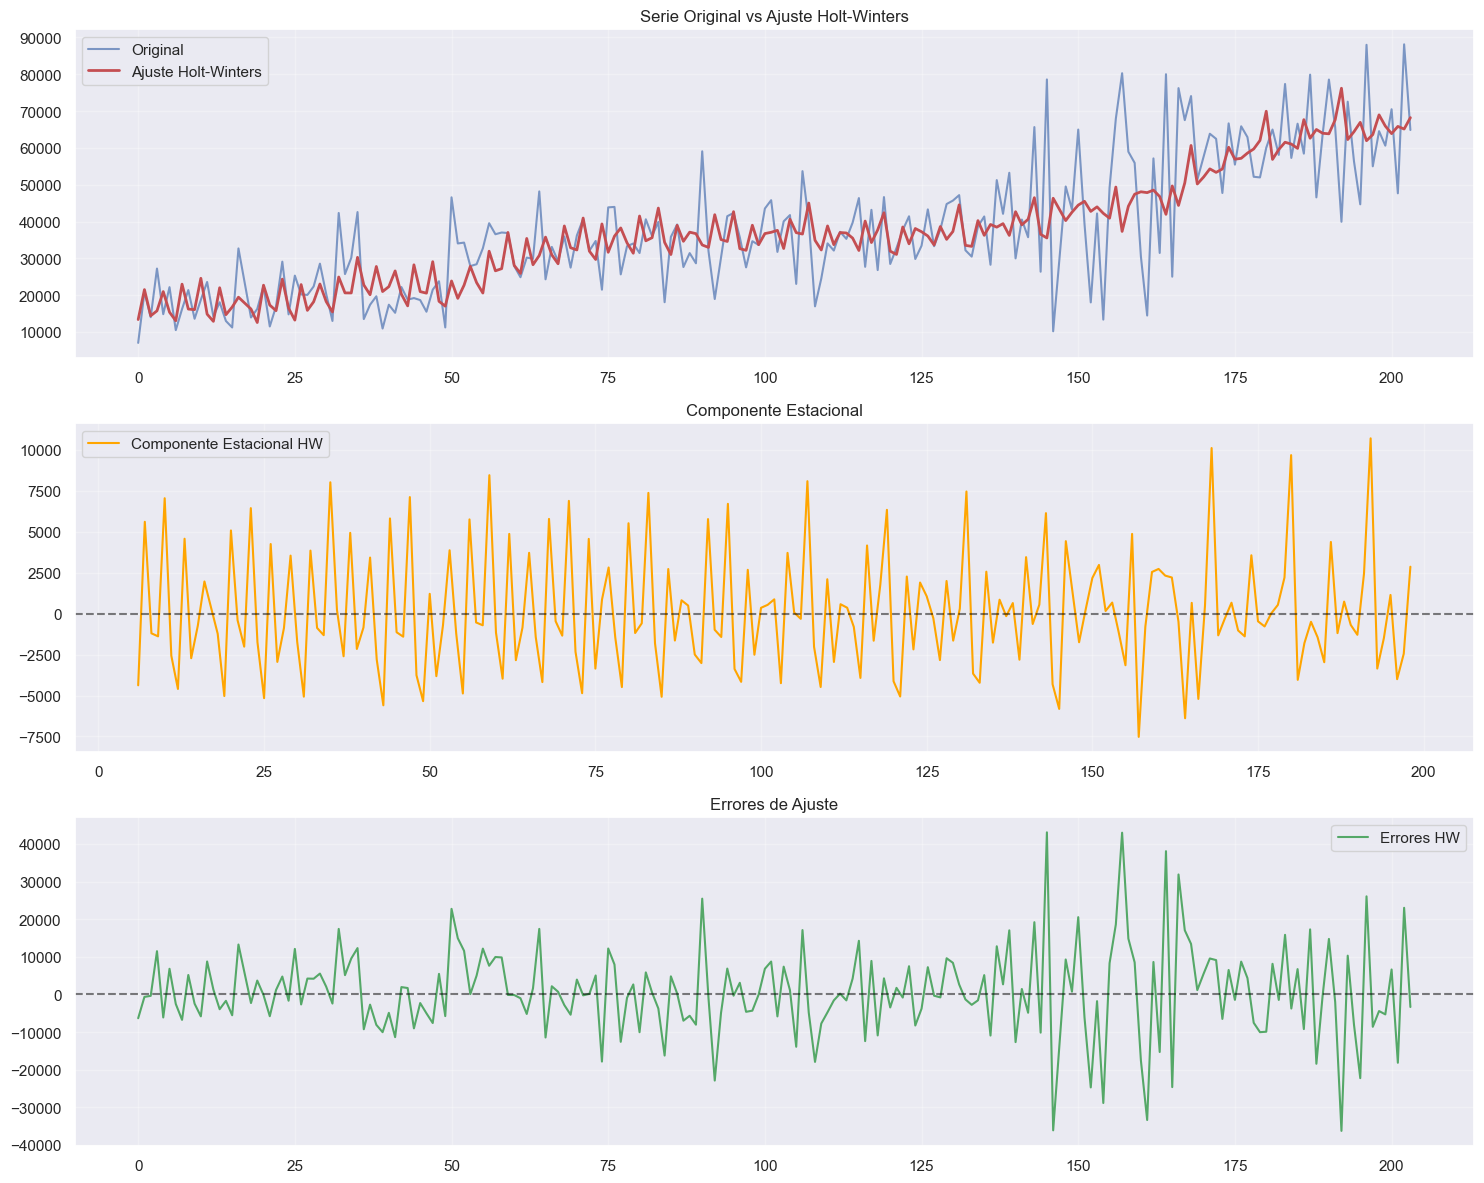

MÉTRICAS DE ERROR - MODELO HOLT-WINTERS
MAE  (Mean Absolute Error):           8609.4985
MSE  (Mean Squared Error):            141840492.5552
RMSE (Root Mean Squared Error):       11909.6806
MAPE (Mean Absolute Percentage Error): 27.70%

ESTADÍSTICAS ADICIONALES
Error promedio (sesgo):               790.0206
Error máximo:                         43065.7901
Error mínimo:                         -36277.4093
Desviación estándar de errores:       11883.4490

INTERPRETACIÓN
• El modelo HW se desvía en promedio 8609.50 unidades
• La precisión relativa es del 72.3% (error 27.7%)
• BUENA precisión (MAPE < 30%)

Métricas guardadas en variable: metricas_hw
Acceso: metricas_hw['MAE'], metricas_hw['RMSE'], etc.

Generando gráficas de diagnóstico...


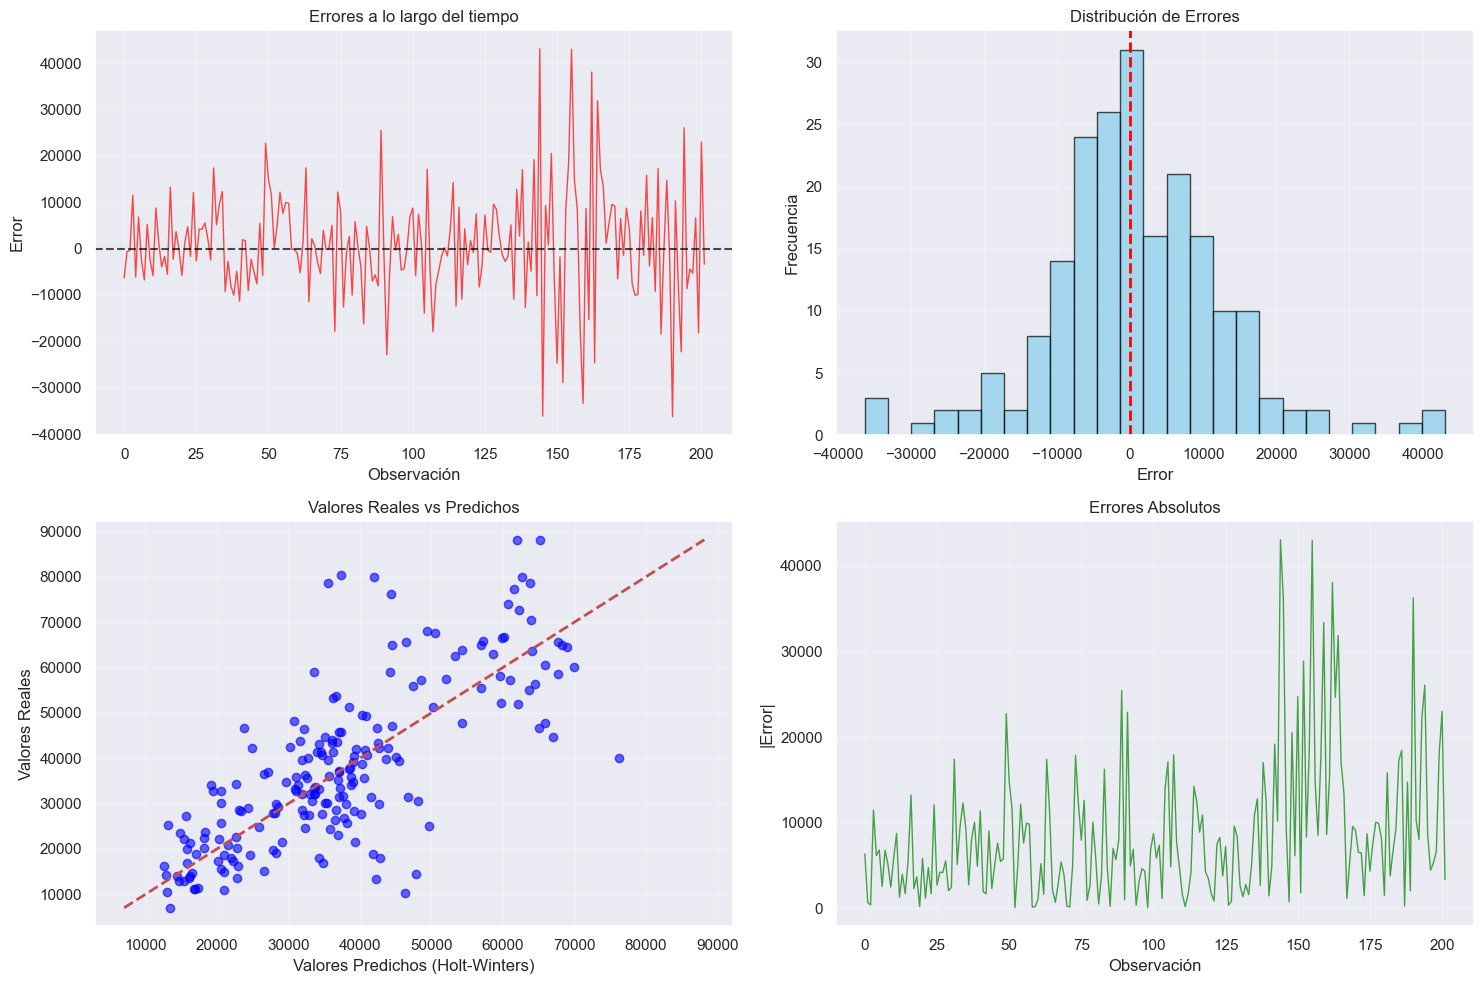

In [21]:

# Crear gráfico con componente estacional (3 gráficos)
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Gráfico 1: Original vs Ajuste Holt-Winters
axes[0].plot(df_clean['UNIDADES'], 'b-', label='Original', alpha=0.7)
axes[0].plot(valores_ajustados, 'r-', label='Ajuste Holt-Winters', linewidth=2)
axes[0].set_title('Serie Original vs Ajuste Holt-Winters')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Componente Estacional
axes[1].plot(componente_estacional, 'orange', label='Componente Estacional HW')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('Componente Estacional')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Errores
axes[2].plot(errores, 'g-', label='Errores HW')
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2].set_title('Errores de Ajuste')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# MOSTRAR RESULTADOS CON FORMATO EXACTO (con estadísticas primero)
print("="*60)
print("MÉTRICAS DE ERROR - MODELO HOLT-WINTERS")
print("="*60)
print(f"MAE  (Mean Absolute Error):           {metricas_hw['MAE']:.4f}")
print(f"MSE  (Mean Squared Error):            {metricas_hw['MSE']:.4f}")
print(f"RMSE (Root Mean Squared Error):       {metricas_hw['RMSE']:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {metricas_hw['MAPE']:.2f}%")

print("\n" + "="*60)
print("ESTADÍSTICAS ADICIONALES")
print("="*60)
print(f"Error promedio (sesgo):               {metricas_hw['Error_promedio']:.4f}")
print(f"Error máximo:                         {errores.max():.4f}")
print(f"Error mínimo:                         {errores.min():.4f}")
print(f"Desviación estándar de errores:       {metricas_hw['Error_std']:.4f}")

print("\n" + "="*60)
print("INTERPRETACIÓN")
print("="*60)
print(f"• El modelo HW se desvía en promedio {metricas_hw['MAE']:.2f} unidades")
print(f"• La precisión relativa es del {100-metricas_hw['MAPE']:.1f}% (error {metricas_hw['MAPE']:.1f}%)")
if metricas_hw['MAPE'] < 20:
    print("• EXCELENTE precisión (MAPE < 20%)")
elif metricas_hw['MAPE'] < 30:
    print("• BUENA precisión (MAPE < 30%)")
elif metricas_hw['MAPE'] < 50:
    print("• ACEPTABLE precisión (MAPE < 50%)")
else:
    print("• BAJA precisión (MAPE > 50%)")

print(f"\nMétricas guardadas en variable: metricas_hw")
print(f"Acceso: metricas_hw['MAE'], metricas_hw['RMSE'], etc.")

# GRÁFICAS DE DIAGNÓSTICO (IGUAL QUE HP)
print("\nGenerando gráficas de diagnóstico...")

# Calcular errores absolutos para el último gráfico
errores_abs = np.abs(errores)

# Crear figura con 4 subplots (2x2) - IGUAL QUE HP
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Errores a lo largo del tiempo
ax1.plot(range(len(errores)), errores, color='red', alpha=0.7, linewidth=1)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax1.set_title('Errores a lo largo del tiempo')
ax1.set_xlabel('Observación')
ax1.set_ylabel('Error')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Distribución de Errores (Histograma)
ax2.hist(errores, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax2.set_title('Distribución de Errores')
ax2.set_xlabel('Error')
ax2.set_ylabel('Frecuencia')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Valores Reales vs Predichos (Scatter plot)
ax3.scatter(valores_ajustados, df_clean['UNIDADES'], alpha=0.6, color='blue')
# Línea de 45 grados (perfecta predicción)
min_val = min(min(valores_ajustados), min(df_clean['UNIDADES']))
max_val = max(max(valores_ajustados), max(df_clean['UNIDADES']))
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax3.set_title('Valores Reales vs Predichos')
ax3.set_xlabel('Valores Predichos (Holt-Winters)')
ax3.set_ylabel('Valores Reales')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Errores Absolutos a lo largo del tiempo
ax4.plot(range(len(errores_abs)), errores_abs, color='green', alpha=0.7, linewidth=1)
ax4.set_title('Errores Absolutos')
ax4.set_xlabel('Observación')
ax4.set_ylabel('|Error|')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

